# Fashion MNIST - Neural Network

In [7]:
import numpy as np
import tensorflow as tf

In [8]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [9]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_class_train), (X_test, Y_class_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

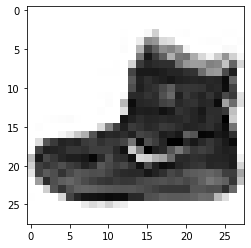

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [13]:
import sys
for x in X_train[0]:
  for i in x:
      sys.stdout.write(f'{i:3d}')
  sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 13 73  0  0  1  4  0  0  0  0  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  3  0 36136127 62 54  0  0  0  1  3  4  0  0  3
  0  0  0  0  0  0  0  0  0  0  0  0  6  0102204176134144123 23  0  0  0  0 12 10  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0155236207178107156161109 64 23 77130 72 15
  0  0  0  0  0  0  0  0  0  0  0  1  0 69207223218216216163127121122146141 88172 66
  0  0  0  0  0  0  0  0  0  1  1  1  0200232232233229223223215213164127123196229  0
  0  0  0  0  0  0  0  0  0  0  0  0  0183225216223228235227224222224221223245173  0
  0  0  0  0  0  0  0  0  0  0  0  0  0193228218213198180212210211213223220243202  0
  0  0  0  0  0  0  0  0  0  1  3  0 1221922021221819216922720821

In [14]:
# 0 ~ 1 사이의 값으로 정규화
X_train = X_train.reshape(-1, 784)
X_train = X_train / 255
X_train.shape

(60000, 784)

In [15]:
X_test = X_test.reshape(-1, 784)
X_test = X_test / 255
type(X_test[0,0])

numpy.float64

In [16]:
class_names[Y_class_train[0]]

'Ankle boot'

In [17]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 모델 정의, 설정, 학습

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [19]:
model = Sequential([
                    Dense(512, input_dim=784, activation='relu'),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 실행환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [22]:
# 모델 최적화 설정
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1,save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [23]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.43495, saving model to ./model/best001-0.4349.hdf5

Epoch 00002: val_loss improved from 0.43495 to 0.38010, saving model to ./model/best002-0.3801.hdf5

Epoch 00003: val_loss improved from 0.38010 to 0.37758, saving model to ./model/best003-0.3776.hdf5

Epoch 00004: val_loss improved from 0.37758 to 0.33831, saving model to ./model/best004-0.3383.hdf5

Epoch 00005: val_loss did not improve from 0.33831

Epoch 00006: val_loss improved from 0.33831 to 0.32659, saving model to ./model/best006-0.3266.hdf5

Epoch 00007: val_loss improved from 0.32659 to 0.32477, saving model to ./model/best007-0.3248.hdf5

Epoch 00008: val_loss did not improve from 0.32477

Epoch 00009: val_loss did not improve from 0.32477

Epoch 00010: val_loss improved from 0.32477 to 0.30540, saving model to ./model/best010-0.3054.hdf5

Epoch 00011: val_loss did not improve from 0.30540

Epoch 00012: val_loss did not improve from 0.30540

Epoch 00013: val_loss did not improv

In [25]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best019-0.2980.hdf5')

In [26]:
acc = best_model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"\n Test Accuracy: {acc:.4f}")

313/313 - 1s - loss: 0.3215 - accuracy: 0.8906

 Test Accuracy: 0.8906


In [27]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

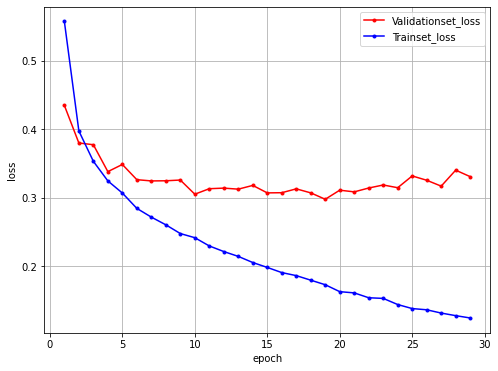

In [28]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()